In this notebook, we will work on mixed variables. That is, when you get a column with both numerical and categorical values in a single feature, then how to handle that situation.

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('titanic.csv')
df.sample(7)

,Cabin,Ticket,number,Survived
139,B86,PC 17593,2,0
230,C83,36973,3,1
130,NaN,349241,5,0
880,NaN,230433,4,1
120,NaN,S.O.C. 14879,A,0
654,NaN,365226,4,0
642,NaN,347088,A,0


### Type 1

In this type of mixed variable, the data in each cell will be either a numeric one or a categorical one, but not both at a same time.

In [3]:
df['number'].unique()

array(['5', '3', '6', 'A', '2', '1', '4'], dtype=object)

Text(0.5, 1.0, 'Passengers travelling with ')

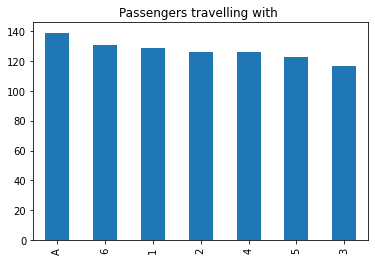

In [10]:
fig = df['number'].value_counts().plot.bar()
fig.set_title('Passengers travelling with ')

In [13]:
#Extracting Numerical Part

"""
errrors='raise' is the default and will generate an error on something like [1,2,'apple'] .
Setting errors to 'ignore' means the problem values will not be converted at all.
Setting errors to 'coerce' will force the column to float and problem values to NaN.
"""

df['number_num'] = pd.to_numeric(df['number'],errors='coerce',downcast='integer')

In [17]:
#Extracting Categorical Part
df['number_cat'] = np.where(df['number_num'].isnull(),df['number'],np.nan)

In [18]:
df.sample(7)

,Cabin,Ticket,number,Survived,number_num,number_cat
204,NaN,A/5 3540,6,1,6.0,NaN
157,NaN,SOTON/OQ 392090,1,0,1.0,NaN
602,NaN,113796,1,0,1.0,NaN
212,NaN,A/5 21174,A,0,NaN,A
48,NaN,2662,6,0,6.0,NaN
124,D26,35281,6,0,6.0,NaN
50,NaN,3101295,1,0,1.0,NaN


### Type 2

In this type of mixed variable, the data in each cell has numerical and categorical element combined. And we need to separate them and make new columns.

In [19]:
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [21]:
df['Ticket'].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [23]:
"""
Captures Numerical part
"""
df['Cabin_num'] = df['Cabin'].str.extract('(\d+)')

In [24]:
"""
Captures Categorical part
"""
df['Cabin_cat'] = df['Cabin'].str[0]

In [25]:
df

,Cabin,Ticket,number,Survived,number_num,number_cat,Cabin_num,Cabin_cat
0,NaN,A/5 21171,5,0,5.0,NaN,NaN,NaN
1,C85,PC 17599,3,1,3.0,NaN,85,C
2,NaN,STON/O2. 3101282,6,1,6.0,NaN,NaN,NaN
3,C123,113803,3,1,3.0,NaN,123,C
4,NaN,373450,A,0,NaN,A,NaN,NaN
...,...,...,...,...,...,...,...,...
886,NaN,211536,3,0,3.0,NaN,NaN,NaN
887,B42,112053,3,1,3.0,NaN,42,B
888,NaN,W./C. 6607,1,0,1.0,NaN,NaN,NaN
889,C148,111369,2,1,2.0,NaN,148,C


In [26]:
df['Cabin_cat'].unique()

array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

<AxesSubplot:>

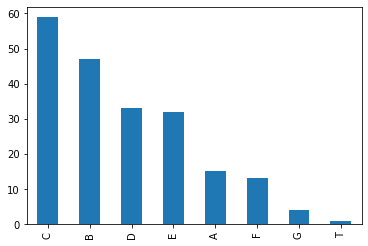

In [28]:
df['Cabin_cat'].value_counts().plot.bar()

In [47]:
"""
Extracting the last part of Ticket as number.
"""
df['Ticket_num'] = df['Ticket'].apply(lambda s: s.split()[-1])
df['Ticket_num'] = pd.to_numeric(df['Ticket_num'],errors='coerce',downcast='integer')

In [48]:
"""
Extracting the last part of Ticket as Category.
"""
df['Ticket_cat'] = df['Ticket'].apply(lambda s: s.split()[0])
df['Ticket_cat'] = np.where(df['Ticket_cat'].str.isdigit(),np.nan,df['Ticket_cat'])

In [49]:
df.sample(10)

,Cabin,Ticket,number,Survived,number_num,number_cat,Cabin_num,Cabin_cat,Ticket_num,Ticket_cat
195,B80,PC 17569,3,1,3.0,NaN,80,B,17569.0,PC
23,A6,113788,4,1,4.0,NaN,6,A,113788.0,NaN
529,NaN,29104,A,0,NaN,A,NaN,NaN,29104.0,NaN
309,E36,PC 17485,3,1,3.0,NaN,36,E,17485.0,PC
580,NaN,237789,6,1,6.0,NaN,NaN,NaN,237789.0,NaN
702,NaN,2691,5,0,5.0,NaN,NaN,NaN,2691.0,NaN
797,NaN,349244,3,1,3.0,NaN,NaN,NaN,349244.0,NaN
333,NaN,345764,1,0,1.0,NaN,NaN,NaN,345764.0,NaN
800,NaN,250647,6,0,6.0,NaN,NaN,NaN,250647.0,NaN
602,NaN,113796,1,0,1.0,NaN,NaN,NaN,113796.0,NaN
